In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from  tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Attention
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from random import randint, uniform
from keras.utils import to_categorical

In [ ]:
EPOCHS = 30
INIT_LR = 1e-3
BS = 8
default_image_size = tuple((224, 224))
image_size = 0
directory_root = '/content/drive/MyDrive/PLANT_DISEASES_DATASET/RESIZE'
width=196
height=196
depth=3

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (224, 224))
            return image
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:

            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
            print(f"[INFO] Processing {plant_disease_folder} {len(plant_disease_image_list)}")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".JPEG") == True:
                    img=convert_image_to_array(image_directory)
                    image = cv2.imread(image_directory)
                    if image is not None :
                        image = cv2.resize(image, (196, 196)).flatten()
                        image_list.append(img)
                        label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing APPLE_HEALTHY 1500
[INFO] Processing APPLE_RUST 1500
[INFO] Processing APPLE_SCAB 1500
[INFO] Processing CASHEW_ANTHRACNOSE 1500
[INFO] Processing CASHEW_HEALTHY 1500
[INFO] Processing CASHEW_RED_RUST 1500
[INFO] Processing CASSAVA_BROWN_SPOT 1500
[INFO] Processing CASSAVA_HEALTHY 1500
[INFO] Processing CASSAVA_MOSAIC_VIRUS 1500
[INFO] Processing COCOA_ANTHRACNOSE 1500
[INFO] Processing COCOA_CSSVD 1500
[INFO] Processing COCOA_HEALTHY 1500
[INFO] Processing GRAPE_BLACK_MEASLES 1500
[INFO] Processing GRAPE_BLACK_ROT 1500
[INFO] Processing GRAPE_HEALTHY 1500
[INFO] Processing GROUNDNUT_HEALTHY 1500
[INFO] Processing GROUNDNUT_LEAF_SPOT 1500
[INFO] Processing GROUNDNUT_RUST 1500
[INFO] Processing MAIZE_HEALTHY 1500
[INFO] Processing MAIZE_MOSAIC_VIRUS 1500
[INFO] Processing MAIZE_STREAK_VIRUS 1500
[INFO] Processing POTATO_EARLY_BLIGHT 1500
[INFO] Processing POTATO_HEALTHY 1500
[INFO] Processing POTATO_LATE_BLIGHT 1500
[INFO] Processing TOMATO_EA

In [ ]:
image_size = len(image_list)

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)

['APPLE_HEALTHY' 'APPLE_RUST' 'APPLE_SCAB' 'BEANS_ANGULAR_LEAF_SPOT'
 'BEANS_HEALTHY' 'BEANS_RUST' 'CASHEW_ANTHRACNOSE' 'CASHEW_HEALTHY'
 'CASHEW_RED_RUST' 'CASSAVA_BROWN_SPOT' 'CASSAVA_HEALTHY'
 'CASSAVA_MOSAIC_VIRUS' 'COCOA_ANTHRACNOSE' 'COCOA_CSSVD' 'COCOA_HEALTHY'
 'GRAPE_BLACK_MEASLES' 'GRAPE_BLACK_ROT' 'GRAPE_HEALTHY'
 'GROUNDNUT_HEALTHY' 'GROUNDNUT_LEAF_SPOT' 'GROUNDNUT_RUST'
 'MAIZE_HEALTHY' 'MAIZE_MOSAIC_VIRUS' 'MAIZE_STREAK_VIRUS'
 'POTATO_EARLY_BLIGHT' 'POTATO_HEALTHY' 'POTATO_LATE_BLIGHT'
 'TOMATO_EARLY_BLIGHT' 'TOMATO_HEALTHY' 'TOMATO_SEPTORIA_LEAF_SPOT']


In [ ]:
np_image_list = np.array(image_list, dtype="float") / 255.0

In [ ]:
img_height, img_width, num_channels = 224, 224, 3
num_classes = 30

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torchvision import transforms
import time

In [ ]:
x_train.shape

(4800, 224, 224, 3)

In [ ]:
# Convert your data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

In [ ]:
!pip install vit-keras
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
from vit_keras import vit

# Your existing code...

# Assuming you have set image_size to 224 and patch_size to a valid value
image_size = 224
patch_size = 16

# Initialize ViT model
model = vit.vit_b16(
    image_size=image_size,
    activation='softmax',
    pretrained=False,
    include_top=True,
    pretrained_top=False,
    classes=n_classes,
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=INIT_LR), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
H=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BS)


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


Epoch 1/30
600/600 [==============================] - 108s 129ms/step - loss: 3.4677 - accuracy: 0.0415 - val_loss: 3.4764 - val_accuracy: 0.0367
Epoch 2/30
600/600 [==============================] - 74s 123ms/step - loss: 3.0695 - accuracy: 0.1238 - val_loss: 2.4972 - val_accuracy: 0.2608
Epoch 3/30
600/600 [==============================] - 74s 123ms/step - loss: 2.0619 - accuracy: 0.3635 - val_loss: 1.7676 - val_accuracy: 0.4258
Epoch 4/30
600/600 [==============================] - 74s 123ms/step - loss: 1.6259 - accuracy: 0.4683 - val_loss: 1.4876 - val_accuracy: 0.5333
Epoch 5/30
600/600 [==============================] - 74s 123ms/step - loss: 1.3872 - accuracy: 0.5417 - val_loss: 1.2913 - val_accuracy: 0.5400
Epoch 6/30
600/600 [==============================] - 74s 123ms/step - loss: 1.2233 - accuracy: 0.5894 - val_loss: 1.0968 - val_accuracy: 0.6308
Epoch 7/30
600/600 [==============================] - 74s 123ms/step - loss: 1.1174 - accuracy: 0.6381 - val_loss: 1.0106 - val_a

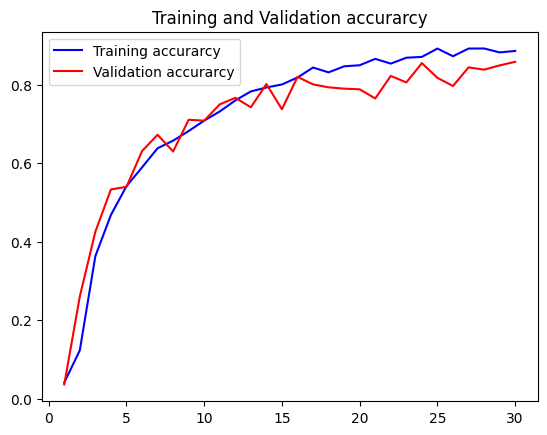

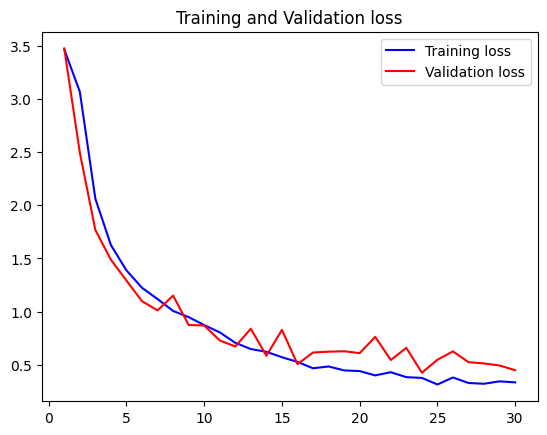

In [ ]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

38/38 [==============================] - 5s 143ms/step
Accuracy   : 0.8583333333333333
Precision : 0.8583333333333333
Recall    : 0.8583333333333333
F1-score  : 0.8561491417238559


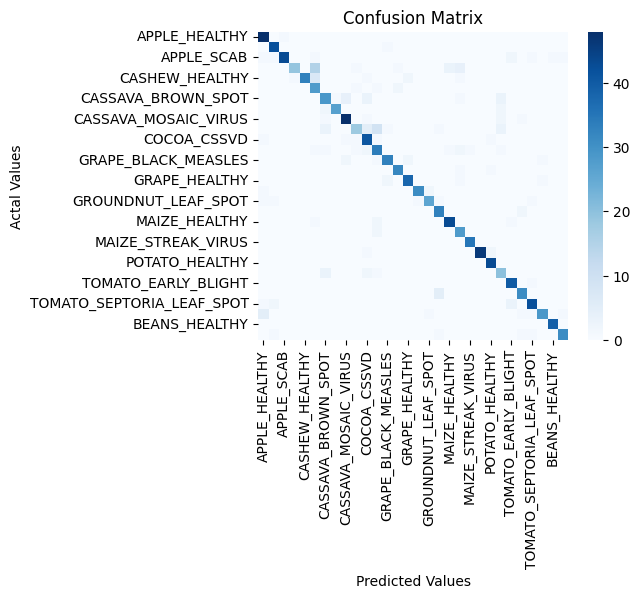

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred, average='micro')
print("Precision :", precision)
recall = recall_score(y_test, y_pred, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred, average='weighted')
print("F1-score  :", F1_score)
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['APPLE_HEALTHY','APPLE_RUST','APPLE_SCAB','CASHEW_ANTHRACNOSE','CASHEW_HEALTHY','CASHEW_RED_RUST','CASSAVA_BROWN_SPOT','CASSAVA_HEALTHY','CASSAVA_MOSAIC_VIRUS','COCOA_ANTHRACNOSE','COCOA_CSSVD','COCOA_HEALTHY','GRAPE_BLACK_MEASLES','GRAPE_BLACK_ROT','GRAPE_HEALTHY','GROUNDNUT_HEALTHY','GROUNDNUT_LEAF_SPOT','GROUNDNUT_RUST','MAIZE_HEALTHY','MAIZE_MOSAIC_VIRUS','MAIZE_STREAK_VIRUS','POTATO_EARLY_BLIGHT','POTATO_HEALTHY','POTATO_LATE_BLIGHT','TOMATO_EARLY_BLIGHT','TOMATO_HEALTHY','TOMATO_SEPTORIA_LEAF_SPOT','BEANS_ANGULAR_LEAF_SPOT','BEANS_HEALTHY','BEANS_RUST'],
                     columns = ['APPLE_HEALTHY','APPLE_RUST','APPLE_SCAB','CASHEW_ANTHRACNOSE','CASHEW_HEALTHY','CASHEW_RED_RUST','CASSAVA_BROWN_SPOT','CASSAVA_HEALTHY','CASSAVA_MOSAIC_VIRUS','COCOA_ANTHRACNOSE','COCOA_CSSVD','COCOA_HEALTHY','GRAPE_BLACK_MEASLES','GRAPE_BLACK_ROT','GRAPE_HEALTHY','GROUNDNUT_HEALTHY','GROUNDNUT_LEAF_SPOT','GROUNDNUT_RUST','MAIZE_HEALTHY','MAIZE_MOSAIC_VIRUS','MAIZE_STREAK_VIRUS','POTATO_EARLY_BLIGHT','POTATO_HEALTHY','POTATO_LATE_BLIGHT','TOMATO_EARLY_BLIGHT','TOMATO_HEALTHY','TOMATO_SEPTORIA_LEAF_SPOT','BEANS_ANGULAR_LEAF_SPOT','BEANS_HEALTHY','BEANS_RUST'])


plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

